カーネル  
https://www.kaggle.com/poonaml/deep-neural-network-keras-way

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense , Dropout , Lambda, Flatten
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [9]:
# データの読み込み
# create the training & test sets, skipping the header row with [1:]
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test= pd.read_csv("test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train = (train.iloc[:,1:].values).astype('float32') # all pixel values (exclude label's column)
y_train = train.iloc[:,0].values.astype('int32') # only labels i.e targets digits
X_test = test.values.astype('float32')

In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train

array([1, 0, 1, ..., 7, 6, 9])

In [14]:

# Data Visialization
X_train.shape[0]

42000

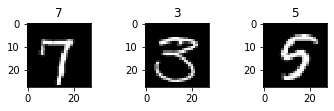

In [15]:
#Convert train datset to (num_images, img_rows, img_cols) format 
#データ配列を（画像数, 各画像の行数, 各画像の列数）の3次元配列に変換
X_train = X_train.reshape(X_train.shape[0], 28, 28)


for i in range(6, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i]);

In [16]:
#expand 1 more dimention as 1 for colour channel gray
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_train.shape

(42000, 28, 28, 1)

In [20]:
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_test.shape

(28000, 28, 28, 1)

In [25]:
X_train[0][0].shape

(28, 1)

In [26]:
# Preprocessing the digit images
# Feature Standardization

In [27]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

In [28]:
# One Hot encoding of labels.
# A one-hot vector is a vector which is 0 in most dimensions, and 1 in a single dimension. 
# In this case, the nth digit will be represented as a vector which is 1 in the nth dimension.

# For example, 3 would be [0,0,0,1,0,0,0,0,0,0].

In [29]:
from keras.utils.np_utils import to_categorical
y_train= to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes

10

In [30]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

([<matplotlib.axis.XTick at 0x2dd1bc91a20>,
 <a list of 10 Text xticklabel objects>)

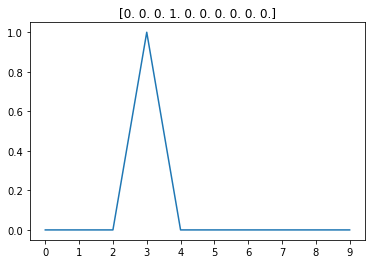

In [32]:
# Lets plot 10th label.

plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))

In [33]:
# Oh its 3 !

# Designing Neural Network Architecture

In [34]:
# fix random seed for reproducibility
seed = 43
np.random.seed(seed)

In [35]:
# Linear Model

from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D

In [36]:
# Lets create a simple model from Keras Sequential layer.

# Lambda layer performs simple arithmetic operations like sum, average, exponentiation etc.

# In 1st layer of the model we have to define input dimensions of our data in (rows,columns,colour channel) 
#  format. (In theano colour channel comes first)

# Flatten will transform input into 1D array.
# Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in
#  fully connected layer. In the last layer we have to specify output dimensions/classes of the model. 
# Here it's 10, since we have to output 10 different digit labels.

model= Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

W0910 18:46:20.841363 24808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0910 18:46:21.049250 24808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0910 18:46:21.182393 24808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



input shape  (None, 28, 28, 1)
output shape  (None, 10)


In [40]:
# Compile network
# Before making network ready for training we have to make sure to add below things:

# A loss function: to measure how good the network is

# An optimizer: to update network as it sees more data and reduce loss value

# Metrics: to monitor performance of network


from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])
from keras.preprocessing import image
gen = image.ImageDataGenerator()

In [41]:
# Cross Validation

In [42]:
from sklearn.model_selection import train_test_split
X = X_train
y = y_train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches=gen.flow(X_val, y_val, batch_size=64)

In [44]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/3
37800/37800 [==============================] - 148s 4ms/step - loss: 0.2301 - acc: 0.9373 - val_loss: 0.3344 - val_acc: 0.9104
Epoch 2/3
37800/37800 [==============================] - 130s 3ms/step - loss: 0.2147 - acc: 0.9419 - val_loss: 0.3576 - val_acc: 0.9079
Epoch 3/3
37800/37800 [==============================] - 129s 3ms/step - loss: 0.2095 - acc: 0.9438 - val_loss: 0.3678 - val_acc: 0.9101


In [45]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

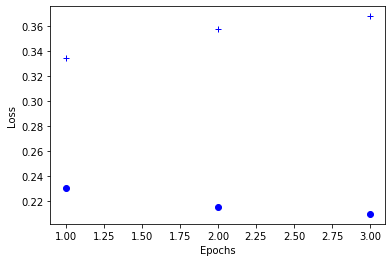

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [47]:
# Fully Connected Model
# Neurons in a fully connected layer have full connections to all activations in the previous layer, 
# 　as seen in regular Neural Networks. Adding another Dense Layer to model.

In [48]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='Adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [49]:
fc = get_fc_model()
fc.optimizer.lr=0.01

In [50]:
history=fc.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 465s 12ms/step - loss: 0.1587 - acc: 0.9726 - val_loss: 0.5265 - val_acc: 0.9512


In [51]:
# Convolutional Neural Network
# CNNs are extremely efficient for images.

In [52]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [53]:
model= get_cnn_model()
model.optimizer.lr=0.01

W0910 19:05:01.169359 24808 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [54]:
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 3280s 87ms/step - loss: 3.7325 - acc: 0.7580 - val_loss: 13.3973 - val_acc: 0.1688


In [55]:
# Data Augmentation
# It is tehnique of showing slighly different or new images to neural network to avoid overfitting. And to achieve better generalization. In case you have very small dataset, you can use different kinds of data augmentation techniques to increase your data size. Neural networks perform better if you provide them more data.

# Different data aumentation techniques are as follows:

# Cropping
# Rotating
# Scaling
# Translating
# Flipping
# Adding Gaussian noise to input images etc.

In [56]:
gen =ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=64)
val_batches = gen.flow(X_val, y_val, batch_size=64)

In [57]:
model.optimizer.lr=0.001
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 3485s 92ms/step - loss: 9.1005 - acc: 0.4354 - val_loss: 9.4253 - val_acc: 0.4152


In [58]:
# Adding Batch Normalization
# BN helps to fine tune hyperparameters more better and train really deep neural networks.

In [59]:
from keras.layers.normalization import BatchNormalization

def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32,(3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64,(3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
        ])
    model.compile(Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [60]:
model= get_bn_model()
model.optimizer.lr=0.01
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=1, validation_data=val_batches, validation_steps=val_batches.n)

Epoch 1/1
37800/37800 [==============================] - 6190s 164ms/step - loss: 0.0357 - acc: 0.9901 - val_loss: 0.0652 - val_acc: 0.9892


In [61]:
# Submitting Predictions to Kaggle.
# Make sure you use full train dataset here to train model and predict on test set.


model.optimizer.lr=0.01
gen = image.ImageDataGenerator()
batches = gen.flow(X, y, batch_size=64)
history=model.fit_generator(generator=batches, steps_per_epoch=batches.n, epochs=3)

Epoch 1/3
10525/42000 [======>.......................] - ETA: 1:28:29 - loss: 0.0117 - acc: 0.9974

KeyboardInterrupt: 

In [ ]:
predictions = model.predict_classes(X_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("DR.csv", index=False, header=True)